In [70]:
setwd("/Users/jmarks/OneDrive - Research Triangle Institute/Projects/Nicotine/nelson/")
alcohol <- read.table("20190307.nicotine.nelson.alcabuse+alcoholdep4+ftnd.overlap.txt", header=T)

head(alcohol)
length(alcohol$FTND)

iid,FTND,alcabuse,alcoholdep4
124153,0,1,1
153753,0,1,1
141752,0,2,1
32552,0,1,1
104552,0,1,1
104802,0,2,1


[1] 1138

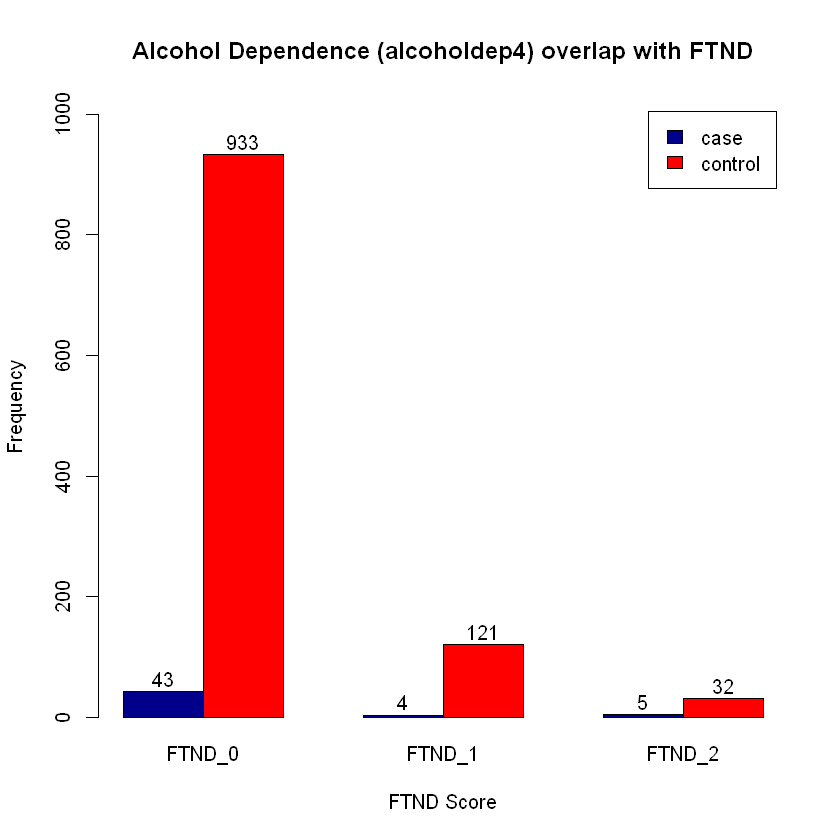

In [77]:
mycols <- c("FTND_0", "FTND_1", "FTND_2")
myrows <- c("case", "control")
mydf <- data.frame(matrix(ncol = 3, nrow = 2))
colnames(mydf) <- mycols
row.names(mydf) <- myrows

for (ftnd_score in 0:2) {
    control_count <- 0
    case_count <- 0
    for (score in 1:length(alcohol$FTND)) {
       if (alcohol$FTND[score] == ftnd_score){
           if (alcohol$alcoholdep4[score] == 1) {
               control_count <- control_count + 1
           }
           else {
               case_count <- case_count + 1
           }
       }
    }
    mydf[1, ftnd_score + 1] <- case_count
    mydf[2, ftnd_score + 1] <- control_count
}

#hist(alcohol$FTND)

ylim = 1.1*c(0, max(mydf))
x <- barplot(as.matrix(mydf), main="Alcohol Dependence (alcoholdep4) overlap with FTND",
  xlab="FTND Score", col=c("darkblue","red"), ylab="Frequency",
  legend = rownames(mydf), beside=TRUE, ylim=ylim)

y<-as.matrix(mydf)

text(x, y+22,labels=as.character(y))